**Florianópolis Downtown Real State Data Analysis**

Hello! I'm Eduardo Adriani Rapanos and today I will try to propose many insights about the Florianópolis Downtown Real State Data. 

The data was provided by the LOCATES technologic company, that I work nowadays, with the purpose of I apply the knowledge of the Data Science Course, that I've been doing.

For maintain the value of the products of the LOCATES co., I selected old adverts from the first semester of 2022.

We will explore the Real State Data from the Downtown neighborhood of Florianópolis City, Brazil. The data were collected from internet adverts that is, they are real ads. We are interested in the propoerties which are saling, to indentify the **spatial distribution of the apartament meter square of these properties on the neighbohood** and compare secondarily it if a role data, including data without coordinates.

This processes were developed in this project:

1. Download the data from LOCATES co. database;
2. Importing the data set to Kaggle;
3. Data structure and content analysis;
4. Data cleaning;
5. Data visualization: analysis between de data with values to lat/lon columns and data with NaN values to these columns;
6. Data visualization: a Square Meter Apartament Value Map from Downtown of Florianópolis, Santa Catarina, Brazil;
7. Final Considerations.

# Importing the data

In [1]:
# Lets read the data using a pandas dataframe:

import pandas as pd

In [2]:
# Here, we are opening our data set and including the 'na' to empty cels:

df = pd.read_csv('/kaggle/input/florianpolis-downtown-real-state-analysis-fdrsa/tb_mercadoimob.csv', na_values = 'na')

In [3]:
# Now, we will use the .head() method to read the 10 first lines of the archive:

df.head(n=10)

date_part     id                                             titulo  \
0       12.0   7784      Florianópolis - Apartamento Padrão - Trindade   
1       12.0  11420  Apartamento para venda possui 46 metros quadra...   
2       12.0  11432  Apartamento com 3 dormitórios à venda, 75 m² p...   
3       12.0  11444                           APARTAMENTOFLORIANÓPOLIS   
4       12.0  11445  Apartamento para venda com 3 quartos em Centro...   
5       12.0  11448  Apartamento para venda com 93 metros quadrados...   
6       12.0  11460                     MUITO ESPAÇO NA ESTEVES JÚNIOR   
7       12.0  11467       Centro | Apartamento 2 suítes + garagem e hb   
8       12.0  11472  PROX AO CATARINENSE - DESOCUPADO - VAGA PARA 0...   
9       12.0  11473  Apartamento para venda com 31 metros quadrados...   

                                           descricao   area  \
0  Excelente apartamento no bairro Trindade de 3 ...   91.0   
1  O apartamento está localizado no bairro Centro...   46.0   
2  Ótimo Apartamento com 03 quartos à Venda no Ce...   75.0   
3  Apartamento Mobiliado com Vista Mar no Centro ...   80.0   
4  Apartamento com 3 dormitórios, sendo 1 suíte, ...   77.0   
5  O apartamento está localizado no bairro Centro...   93.0   
6  MUITO ESPAÇO NA ESTEVES JÚNIOR!<br>Um verdadei...  197.0   
7  Apartamento com o conceito Clima, Mesa e Banho...   77.0   
8  EXCELENTE APTO NA ESTEVES JUNIOR - ENSOLARADO ...  124.0   
9  Apartamento de 1 dormitório com 31m² de área p...   31.0   

          data_anuncio id_fonte  num_andares  num_vagas_garagem  num_suites  \
0  2020-04-22 14:40:19     1189            0                  2           1   
1  2022-03-19 15:09:57   NEOV9P            7                  2           1   
2  2022-02-09 03:51:58   AP0234            0                  2           1   
3  2022-02-25 15:08:44  AP00443            0                  1           0   
4  2022-02-20 14:30:14    22957            0                  2           1   
5  2022-02-15 16:36:09   J9PSC2           12                  1           1   
6  2021-08-01 06:57:55   AP0171            0                  1           1   
7  2022-02-03 03:56:32  PI11757            0                  1           2   
8  2022-02-19 11:45:01       86            0                  2           1   
9  2022-03-10 19:18:25  ap00471            0                  0           0   

   ...       complemento            logradouro  numero  precisao  \
0  ...               NaN                   NaN     NaN       NaN   
1  ...               NaN     Rua Irmão Joaquim   226.0       4.0   
2  ...               NaN                   NaN     NaN       NaN   
3  ...               NaN                   NaN     NaN       NaN   
4  ...               NaN    Avenida Rio Branco   476.0       4.0   
5  ...               NaN    Avenida Rio Branco     NaN       NaN   
6  ...   Apartamento 101    Rua Esteves Júnior   458.0       4.0   
7  ...  Apartamento 1101                   NaN     NaN       NaN   
8  ...               NaN                   NaN     NaN       NaN   
9  ...               NaN  Rua Arcipreste Paiva    93.0       3.0   

                                               ponto        lat        lon  \
0                                                NaN        NaN        NaN   
1  0101000020E61000002060ADDA354548C0755776C1E096... -27.589367 -48.540706   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4  0101000020E6100000AE9CBD33DA4648C053211E899797... -27.592156 -48.553534   
5                                                NaN        NaN        NaN   
6  0101000020E6100000917D9065C14648C0FC1BB4571F97... -27.590322 -48.552777   
7                                                NaN        NaN        NaN   
8                                                NaN        NaN        NaN   
9  0101000020E6100000645C7171544648C01650A8A78F98... -27.595942 -48.549452   

  data_tabela is

In [4]:
# We will print all the columns of the df to discover which that having information about sale

print(df.columns)

Index(['date_part', 'id', 'titulo', 'descricao', 'area', 'data_anuncio',
       'id_fonte', 'num_andares', 'num_vagas_garagem', 'num_suites',
       'num_banheiros', 'num_quartos', 'valor', 'iptu', 'taxa_condominial',
       'contato', 'link_anuncio', 'fonte', 'tipo_imovel', 'tipo_negocio',
       'tipo_uso', 'estado_construcao', 'imovel_lancamento', 'bl_temporada',
       'data_raspagem', 'hash', 'bl_ativo', 'estado_sigla', 'cidade',
       'bairro_tratado', 'cep', 'complemento', 'logradouro', 'numero',
       'precisao', 'ponto', 'lat', 'lon', 'data_tabela', 'is_outlier',
       'latlong'],
      dtype='object')


In [5]:
# The column with the information is 'tipo_negocio'. Lets print the first 10 rows of this column:

print(df['tipo_negocio'].head(10))

0      Venda
1      Venda
2      Venda
3      Venda
4      Venda
5      Venda
6      Venda
7    Aluguel
8      Venda
9      Venda
Name: tipo_negocio, dtype: object


It's true! The **default** columns is 'tipo_negocio'.

In [6]:
# Let's print only the **unique** values of the 'tipo_negocio' column:

unique_values = df['tipo_negocio'].unique()

print(unique_values)

['Venda' 'Aluguel']


Indeed, we've only the **'Venda'** and **'Aluguel'** values for this column.

# **Lets start the structure analysis of the data set:**

In [7]:
# We will use the .shape to return the number of lines and columns:

df.shape

(9236, 41)

In [8]:
# Now, we are print the number of the lines whitch the 'Venda' and 'Aluguel' values:

df[df['tipo_negocio'] == 'Venda'].shape

(7786, 41)

In [9]:
df[df['tipo_negocio'] == 'Aluguel'].shape

(1450, 41)

In [10]:
# Let's do a percentage analysis.

# For this, we are use a placeholder for a variable that we won't use. In this case is the columns number.

amt_total, _ = df.shape
amt_venda, _ = df[df['tipo_negocio'] == 'Venda'].shape
amt_aluguel, _ = df[df['tipo_negocio'] == 'Aluguel'].shape

In [11]:
print(f'The rate of "Venda" is {round(100 * amt_venda / amt_total, 2)}%')

print(f'The rate of "Aluguel" is {round(100 * amt_aluguel / amt_total, 2)}%')

The rate of "Venda" is 84.3%
The rate of "Aluguel" is 15.7%


# Schema and data processing transformation

Now we will develop many steps to transform our data on way to do a spatial analysis. We will do many others transformations with the objective to analyse our data and to maintain your accuracy.

In [12]:
df.head(n=5)

date_part     id                                             titulo  \
0       12.0   7784      Florianópolis - Apartamento Padrão - Trindade   
1       12.0  11420  Apartamento para venda possui 46 metros quadra...   
2       12.0  11432  Apartamento com 3 dormitórios à venda, 75 m² p...   
3       12.0  11444                           APARTAMENTOFLORIANÓPOLIS   
4       12.0  11445  Apartamento para venda com 3 quartos em Centro...   

                                           descricao  area  \
0  Excelente apartamento no bairro Trindade de 3 ...  91.0   
1  O apartamento está localizado no bairro Centro...  46.0   
2  Ótimo Apartamento com 03 quartos à Venda no Ce...  75.0   
3  Apartamento Mobiliado com Vista Mar no Centro ...  80.0   
4  Apartamento com 3 dormitórios, sendo 1 suíte, ...  77.0   

          data_anuncio id_fonte  num_andares  num_vagas_garagem  num_suites  \
0  2020-04-22 14:40:19     1189            0                  2           1   
1  2022-03-19 15:09:57   NEOV9P            7                  2           1   
2  2022-02-09 03:51:58   AP0234            0                  2           1   
3  2022-02-25 15:08:44  AP00443            0                  1           0   
4  2022-02-20 14:30:14    22957            0                  2           1   

   ...  complemento          logradouro  numero  precisao  \
0  ...          NaN                 NaN     NaN       NaN   
1  ...          NaN   Rua Irmão Joaquim   226.0       4.0   
2  ...          NaN                 NaN     NaN       NaN   
3  ...          NaN                 NaN     NaN       NaN   
4  ...          NaN  Avenida Rio Branco   476.0       4.0   

                                               ponto        lat        lon  \
0                                                NaN        NaN        NaN   
1  0101000020E61000002060ADDA354548C0755776C1E096... -27.589367 -48.540706   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4  0101000020E6100000AE9CBD33DA4648C053211E899797... -27.592156 -48.553534   

  data_tabela is_outlier                latlong  
0  2022-12-28          0                    NaN  
1  2022-12-28          0  -27.589367,-48.540706  
2  2022-12-28          0                    NaN  
3  2022-12-28          0                    NaN  
4  2022-12-28          0  -27.592156,-48.553534  

[5 rows x 41 columns]

In [13]:
# we will use the .dtypes to identify the data type of the cells

df.dtypes

date_part            float64
id                     int64
titulo                object
descricao             object
area                 float64
data_anuncio          object
id_fonte              object
num_andares            int64
num_vagas_garagem      int64
num_suites             int64
num_banheiros          int64
num_quartos            int64
valor                float64
iptu                 float64
taxa_condominial     float64
contato              float64
link_anuncio          object
fonte                 object
tipo_imovel           object
tipo_negocio          object
tipo_uso              object
estado_construcao    float64
imovel_lancamento       bool
bl_temporada         float64
data_raspagem         object
hash                  object
bl_ativo                bool
estado_sigla          object
cidade                object
bairro_tratado        object
cep                  float64
complemento           object
logradouro            object
numero               float64
precisao      

**The columns of the dataset are consistent.**

In [14]:
# * Category **atributes**: 

# selecting the columns of type 'object' and using the describe() method to summarize data.
# the transpose() method improve the data visualization

df.select_dtypes('object').describe().transpose()

count unique  \
titulo          9236   2584   
descricao       9231   4535   
data_anuncio    9236   3007   
id_fonte        9236   4440   
link_anuncio    9236   4885   
fonte           9236      1   
tipo_imovel     9236     12   
tipo_negocio    9236      2   
tipo_uso        9236      1   
data_raspagem   9236   9236   
hash            9236   4885   
estado_sigla    9236      1   
cidade          9236      1   
bairro_tratado  9236      1   
complemento     2761    570   
logradouro      5760    133   
ponto           3707    855   
data_tabela     9236      1   
latlong         3707    855   

                                                              top  freq  
titulo                FLORIANóPOLIS - Apartamento Padrão - Centro   752  
descricao       O sentido da vida em harmonia com a natureza.<...    18  
data_anuncio                                  2021-04-14 13:45:29   140  
id_fonte                                                   SA0134    15  
link_anuncio    https://www.vivareal.com.br/imovel/imovel/apar...    12  
fonte                                                   Viva Real  9236  
tipo_imovel                                           Apartamento  5766  
tipo_negocio                                                Venda  7786  
tipo_uso                                                Comercial  9236  
data_raspagem                          2022-03-04 13:35:07.423960     1  
hash            819c1324b1c52c96b82244de4471f773282d9e10e82ad0...    12  
estado_sigla                                                   SC  9236  
cidade                                              Florianópolis  9236  
bairro_tratado                                             Centro  9236  
complemento                                       Apartamento 401    69  
logradouro                                     Rua Felipe Schmidt   358  
ponto           0101000020E61000002CF180B2294748C0A6EECA2E1898...    48  
data_tabela                                            2022-12-28  9236  
latlong                                      -27.594119,-48.55596    48

In [15]:
# * Category **numerics**: 

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

count          mean           std           min  \
date_part          9236.0  1.200000e+01  0.000000e+00  1.200000e+01   
area               9236.0  1.677593e+02  3.571167e+02  0.000000e+00   
num_andares        9236.0  1.000000e+00  3.312459e+00  0.000000e+00   
num_vagas_garagem  9236.0  1.682330e+00  3.907539e+00  0.000000e+00   
num_suites         9236.0  1.016674e+00  1.142449e+00  0.000000e+00   
num_banheiros      9236.0  2.442832e+00  2.022259e+00  0.000000e+00   
num_quartos        9236.0  2.073841e+00  1.554623e+00  0.000000e+00   
valor              9235.0  1.271227e+06  4.444448e+06  2.400000e+02   
iptu               7429.0  5.710714e+03  1.407403e+05  0.000000e+00   
taxa_condominial   7965.0  1.944799e+03  3.069407e+04  0.000000e+00   
contato            7369.0  4.878245e+10  2.459353e+09  1.194895e+10   
estado_construcao     1.0  2.000000e+00           NaN  2.000000e+00   
bl_temporada          0.0           NaN           NaN           NaN   
cep                9234.0  8.801532e+07  4.095609e+03  8.801000e+07   
numero             3118.0  4.816344e+02  2.076683e+03  0.000000e+00   
precisao           3707.0  3.553547e+00  7.746874e-01  1.000000e+00   
lat                3707.0 -2.759178e+01  3.516760e-03 -2.760640e+01   
lon                3707.0 -4.855066e+01  5.236721e-03 -4.856205e+01   
is_outlier         9236.0  0.000000e+00  0.000000e+00  0.000000e+00   

                            25%           50%           75%           max  
date_part          1.200000e+01  1.200000e+01  1.200000e+01  1.200000e+01  
area               6.700000e+01  1.090000e+02  1.732500e+02  5.776000e+03  
num_andares        0.000000e+00  0.000000e+00  0.000000e+00  1.900000e+01  
num_vagas_garagem  1.000000e+00  1.000000e+00  2.000000e+00  7.600000e+01  
num_suites         0.000000e+00  1.000000e+00  2.000000e+00  1.000000e+01  
num_banheiros      1.000000e+00  2.000000e+00  3.000000e+00  3.400000e+01  
num_quartos        0.000000e+00  3.000000e+00  3.000000e+00  2.200000e+01  
valor              3.700000e+05  9.000000e+05  1.700000e+06  3.900000e+08  
iptu               1.410000e+02  8.280000e+02  2.600000e+03  5.416000e+06  
taxa_condominial   4.900000e+02  8.000000e+02  1.300000e+03  1.980000e+06  
contato            4.899129e+10  4.899633e+10  4.899918e+10  5.199268e+10  
estado_construcao  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  
bl_temporada                NaN           NaN           NaN           NaN  
cep                8.801501e+07  8.801530e+07  8.801564e+07  8.812500e+07  
numero             1.110000e+02  2.150000e+02  6.000000e+02  7.867800e+04  
precisao           3.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  
lat               -2.759429e+01 -2.759160e+01 -2.758956e+01 -2.757875e+01  
lon               -4.855476e+01 -4.855005e+01 -4.854666e+01 -4.853445e+01  
is_outlier         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00

# **No Data (NaN) Analysis**

In [16]:
# Let's print all the columns if Nan values. 

# True = there is almost one Nan value.

# printing all the columns if NaN values

df.isna().any()

date_part            False
id                   False
titulo               False
descricao             True
area                 False
data_anuncio         False
id_fonte             False
num_andares          False
num_vagas_garagem    False
num_suites           False
num_banheiros        False
num_quartos          False
valor                 True
iptu                  True
taxa_condominial      True
contato               True
link_anuncio         False
fonte                False
tipo_imovel          False
tipo_negocio         False
tipo_uso             False
estado_construcao     True
imovel_lancamento    False
bl_temporada          True
data_raspagem        False
hash                 False
bl_ativo             False
estado_sigla         False
cidade               False
bairro_tratado       False
cep                   True
complemento           True
logradouro            True
numero                True
precisao              True
ponto                 True
lat                   True
l



Our objective is spatialize the square meter value of our ads. For this, we will do the next steps:


In [17]:
# Let's create a function to calcule the % of NaN data in each number column:

def stats_nan_data(df: pd.DataFrame) -> None:
    
    stats_nan_data = []
    for col in df.columns:
        if df[col].isna().any():
            amt, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_nan_data = {col: {'amount': amt, 'percentage': round(100 * amt/total, 2)}}
            stats_nan_data.append(dict_nan_data)
    
    for stat in stats_nan_data:
        print(stat)

In [18]:
# Let's print a % of NaN values

stats_nan_data(df=df)

{'descricao': {'amount': 5, 'percentage': 0.05}}
{'valor': {'amount': 1, 'percentage': 0.01}}
{'iptu': {'amount': 1807, 'percentage': 19.56}}
{'taxa_condominial': {'amount': 1271, 'percentage': 13.76}}
{'contato': {'amount': 1867, 'percentage': 20.21}}
{'estado_construcao': {'amount': 9235, 'percentage': 99.99}}
{'bl_temporada': {'amount': 9236, 'percentage': 100.0}}
{'cep': {'amount': 2, 'percentage': 0.02}}
{'complemento': {'amount': 6475, 'percentage': 70.11}}
{'logradouro': {'amount': 3476, 'percentage': 37.64}}
{'numero': {'amount': 6118, 'percentage': 66.24}}
{'precisao': {'amount': 5529, 'percentage': 59.86}}
{'ponto': {'amount': 5529, 'percentage': 59.86}}
{'lat': {'amount': 5529, 'percentage': 59.86}}
{'lon': {'amount': 5529, 'percentage': 59.86}}
{'latlong': {'amount': 5529, 'percentage': 59.86}}


In [19]:
# Let's print a % of NaN values where 'tipo_negocio' == 'Venda'

stats_nan_data(df=df[df['tipo_negocio'] == 'Venda'])

{'descricao': {'amount': 2, 'percentage': 0.03}}
{'valor': {'amount': 1, 'percentage': 0.01}}
{'iptu': {'amount': 1405, 'percentage': 18.05}}
{'taxa_condominial': {'amount': 1060, 'percentage': 13.61}}
{'contato': {'amount': 1442, 'percentage': 18.52}}
{'estado_construcao': {'amount': 7785, 'percentage': 99.99}}
{'bl_temporada': {'amount': 7786, 'percentage': 100.0}}
{'cep': {'amount': 2, 'percentage': 0.03}}
{'complemento': {'amount': 5368, 'percentage': 68.94}}
{'logradouro': {'amount': 2817, 'percentage': 36.18}}
{'numero': {'amount': 5024, 'percentage': 64.53}}
{'precisao': {'amount': 4731, 'percentage': 60.76}}
{'ponto': {'amount': 4731, 'percentage': 60.76}}
{'lat': {'amount': 4731, 'percentage': 60.76}}
{'lon': {'amount': 4731, 'percentage': 60.76}}
{'latlong': {'amount': 4731, 'percentage': 60.76}}


In [20]:
# Let's print a % of NaN values where 'tipo_negocio' == 'Aluguel'

stats_nan_data(df=df[df['tipo_negocio'] == 'Aluguel'])

{'descricao': {'amount': 3, 'percentage': 0.21}}
{'iptu': {'amount': 402, 'percentage': 27.72}}
{'taxa_condominial': {'amount': 211, 'percentage': 14.55}}
{'contato': {'amount': 425, 'percentage': 29.31}}
{'estado_construcao': {'amount': 1450, 'percentage': 100.0}}
{'bl_temporada': {'amount': 1450, 'percentage': 100.0}}
{'complemento': {'amount': 1107, 'percentage': 76.34}}
{'logradouro': {'amount': 659, 'percentage': 45.45}}
{'numero': {'amount': 1094, 'percentage': 75.45}}
{'precisao': {'amount': 798, 'percentage': 55.03}}
{'ponto': {'amount': 798, 'percentage': 55.03}}
{'lat': {'amount': 798, 'percentage': 55.03}}
{'lon': {'amount': 798, 'percentage': 55.03}}
{'latlong': {'amount': 798, 'percentage': 55.03}}


We have a high values of percentage with **NaN** value for lat and lon columns. It represents more than 50% of the out data set. Maybe, there aren't information for these columns, for some factors: a lack of information in a complementary columns (numero, logradouro, complemento, etc) or for other reason, these address weren't geocodated.

# **Choosing and separating NaN at lat and lon columns:**

Now we are identify the **lat** and **lon** columns with NaN values and save in a output table.

We pretende, on the next steps, compare the data with coordinates and the data without coordinates,
mainly the sale value of the apartments.

In [21]:
# Identifying the NaN rows in lat and lon columns:

nan_rows_df = df[df['lat'].isna() | df['lon'].isna()]

In [22]:
# Exporting the NaN table to output: 

nan_rows_df.to_csv('/kaggle/working/nan_data.csv', index=False)

In [23]:
# Here, we are opening our NaN data set and including the 'na' to empty cels:

ds = pd.read_csv('/kaggle/working/nan_data.csv', na_values = 'na')

In [24]:
# Printing the lines x columns with our nan_data.csv table:

ds.shape

(5529, 41)

In [25]:
# Printing the lines x columns with our fully data table:

df.shape

(9236, 41)

In [26]:
# Dropping data from df where lat, lon are NaN:

df = df.dropna(subset=['lat', 'lon'])

In [27]:
# Visualizing the number of rows and columns withou NaN values at lat lon:

df.shape

(3707, 41)

In [28]:
# Visualizing the number of rows with 'tipo_negocio' = 'Venda':

df[df['tipo_negocio'] == 'Venda'].shape

(3055, 41)

In [29]:
# Visualizing the number of rows with 'tipo_negocio' = 'Aluguel':

df[df['tipo_negocio'] == 'Aluguel'].shape

(652, 41)

In [30]:
# Creating variables to do some statistics:

amt_total_new, _ = df.shape
amt_venda_new, _ = df[df['tipo_negocio'] == 'Venda'].shape
amt_aluguel_new, _ = df[df['tipo_negocio'] == 'Aluguel'].shape

In [31]:
print(f'The rate of "Venda" is {round(100 * amt_venda / amt_total, 2)}%')
print(f'The new rate of "Venda" is {round(100 * amt_venda_new / amt_total_new, 2)}%')
print('\n')
print(f'The rate of "Aluguel" is {round(100 * amt_aluguel / amt_total, 2)}%')
print(f'The new rate of "Aluguel" is {round(100 * amt_aluguel_new / amt_total_new, 2)}%')

The rate of "Venda" is 84.3%
The new rate of "Venda" is 82.41%


The rate of "Aluguel" is 15.7%
The new rate of "Aluguel" is 17.59%


**The comparison of de fully data table with de new table - without NaN's - is above.**

Indeed, we've a +- 1.9% of increase in a 'new rate Aluguel'.

However the final value is very near to the original condition.

**Here, we will create 4 new df to represent the data.**

One is with 'lat' and 'lon' information and 'tipo_negocio' = 'venda' for our spatial analysis.


The other three are for we do other analysis and verify the accuracy and vigor of our data.

In [32]:
# Creating a variable that select only the 'Venda' at the 'tipo_negocio' colum:

df_venda = df[df['tipo_negocio'] == 'Venda']

In [33]:
# Creating a variable that select only the 'Aluguel' at the 'tipo_negocio' colum:

df_aluguel = df[df['tipo_negocio'] == 'Aluguel']

In [34]:
# ds = the df with NaN values at lat lon columns.

# Creating a variable that select only the 'Venda' at the 'tipo_negocio' colum:

ds_venda = ds[ds['tipo_negocio'] == 'Venda']

In [35]:
# ds = the df with NaN values at lat lon columns.

# Creating a variable that select only the 'Aluguel' at the 'tipo_negocio' colum:

ds_aluguel = df[df['tipo_negocio'] == 'Aluguel']

In [36]:
df_venda.shape

(3055, 41)

In [37]:
ds_venda.shape

(4731, 41)

In [38]:
 # Remembering our 'object' options:

df_venda.select_dtypes('object').head(n=5).transpose()

1   \
titulo          Apartamento para venda possui 46 metros quadra...   
descricao       O apartamento está localizado no bairro Centro...   
data_anuncio                                  2022-03-19 15:09:57   
id_fonte                                                   NEOV9P   
link_anuncio    https://www.vivareal.com.br/imovel/imovel/apar...   
fonte                                                   Viva Real   
tipo_imovel                                           Apartamento   
tipo_negocio                                                Venda   
tipo_uso                                                Comercial   
data_raspagem                          2022-03-22 18:56:57.528671   
hash            77eb0b678013f0a708a893051f3b254f97f615be7c3a89...   
estado_sigla                                                   SC   
cidade                                              Florianópolis   
bairro_tratado                                             Centro   
complemento                                                   NaN   
logradouro                                      Rua Irmão Joaquim   
ponto           0101000020E61000002060ADDA354548C0755776C1E096...   
data_tabela                                            2022-12-28   
latlong                                     -27.589367,-48.540706   

                                                               4   \
titulo          Apartamento para venda com 3 quartos em Centro...   
descricao       Apartamento com 3 dormitórios, sendo 1 suíte, ...   
data_anuncio                                  2022-02-20 14:30:14   
id_fonte                                                    22957   
link_anuncio    https://www.vivareal.com.br/imovel/imovel/apar...   
fonte                                                   Viva Real   
tipo_imovel                                           Apartamento   
tipo_negocio                                                Venda   
tipo_uso                                                Comercial   
data_raspagem                          2022-03-22 18:57:49.890912   
hash            ee6a95b439baa14fb0ca0329827c21be3bd25aa1fbf28a...   
estado_sigla                                                   SC   
cidade                                              Florianópolis   
bairro_tratado                                             Centro   
complemento                                                   NaN   
logradouro                                     Avenida Rio Branco   
ponto           0101000020E6100000AE9CBD33DA4648C053211E899797...   
data_tabela                                            2022-12-28   
latlong                                     -27.592156,-48.553534   

                                                               6   \
titulo                             MUITO ESPAÇO NA ESTEVES JÚNIOR   
descricao       MUITO ESPAÇO NA ESTEVES JÚNIOR!<br>Um verdadei...   
data_anuncio                                  2021-08-01 06:57:55   
id_fonte                                                   AP0171   
link_anuncio    https://www.vivareal.com.br/imovel/imovel/apar...   
fonte                                                   Viva Real   
tipo_imovel                                           Apartamento   
tipo_negocio                                                Venda   
tipo_uso                                                Comercial   
data_raspagem                          2022-03-22 18:58:20.451661   
hash            e828ed27f99904785cab69b5c96bd774a5b5aaed20c3ce...   
estado_sigla                                                   SC   
cidade                                              Florianópolis   
bairro_tratado                                             Centro   
complemento                                       Apartamento 101   
logradouro                                     Rua Esteves Júnior   
ponto           0101000020E6100000917D9065C14648C0FC1BB4571F97...   
data_tabela                                            2022

In [39]:
# Let's print the columns of our datasets:

print(df_venda.columns)
print(ds_venda.columns)

Index(['date_part', 'id', 'titulo', 'descricao', 'area', 'data_anuncio',
       'id_fonte', 'num_andares', 'num_vagas_garagem', 'num_suites',
       'num_banheiros', 'num_quartos', 'valor', 'iptu', 'taxa_condominial',
       'contato', 'link_anuncio', 'fonte', 'tipo_imovel', 'tipo_negocio',
       'tipo_uso', 'estado_construcao', 'imovel_lancamento', 'bl_temporada',
       'data_raspagem', 'hash', 'bl_ativo', 'estado_sigla', 'cidade',
       'bairro_tratado', 'cep', 'complemento', 'logradouro', 'numero',
       'precisao', 'ponto', 'lat', 'lon', 'data_tabela', 'is_outlier',
       'latlong'],
      dtype='object')
Index(['date_part', 'id', 'titulo', 'descricao', 'area', 'data_anuncio',
       'id_fonte', 'num_andares', 'num_vagas_garagem', 'num_suites',
       'num_banheiros', 'num_quartos', 'valor', 'iptu', 'taxa_condominial',
       'contato', 'link_anuncio', 'fonte', 'tipo_imovel', 'tipo_negocio',
       'tipo_uso', 'estado_construcao', 'imovel_lancamento', 'bl_temporada',
       'd

**For the purpose of calculate the square meter value**

We will create a columns 'valor_m2' at the df_venda e ds_venda.

In [40]:
df_venda['valor_m2'] = df_venda['valor'] / df_venda['area']

ds_venda['valor_m2'] = ds_venda['valor'] / ds_venda['area']

/tmp/ipykernel_32/4174002943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venda['valor_m2'] = df_venda['valor'] / df_venda['area']
/tmp/ipykernel_32/4174002943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_venda['valor_m2'] = ds_venda['valor'] / ds_venda['area']


# It's done!


# **Data Visualization**

The data were done. Now, we will create many visualizations to correlact the explicative variables with the anser variable ('tipo_negocio' = 'Venda') to understad the spatial distribution of the meter square on the Downtown of Florianópolis.

In [41]:
# Importing new libraries

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

from folium import plugins

from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap

 
# Selecting the general style with witegrid

sns.set_style('whitegrid')

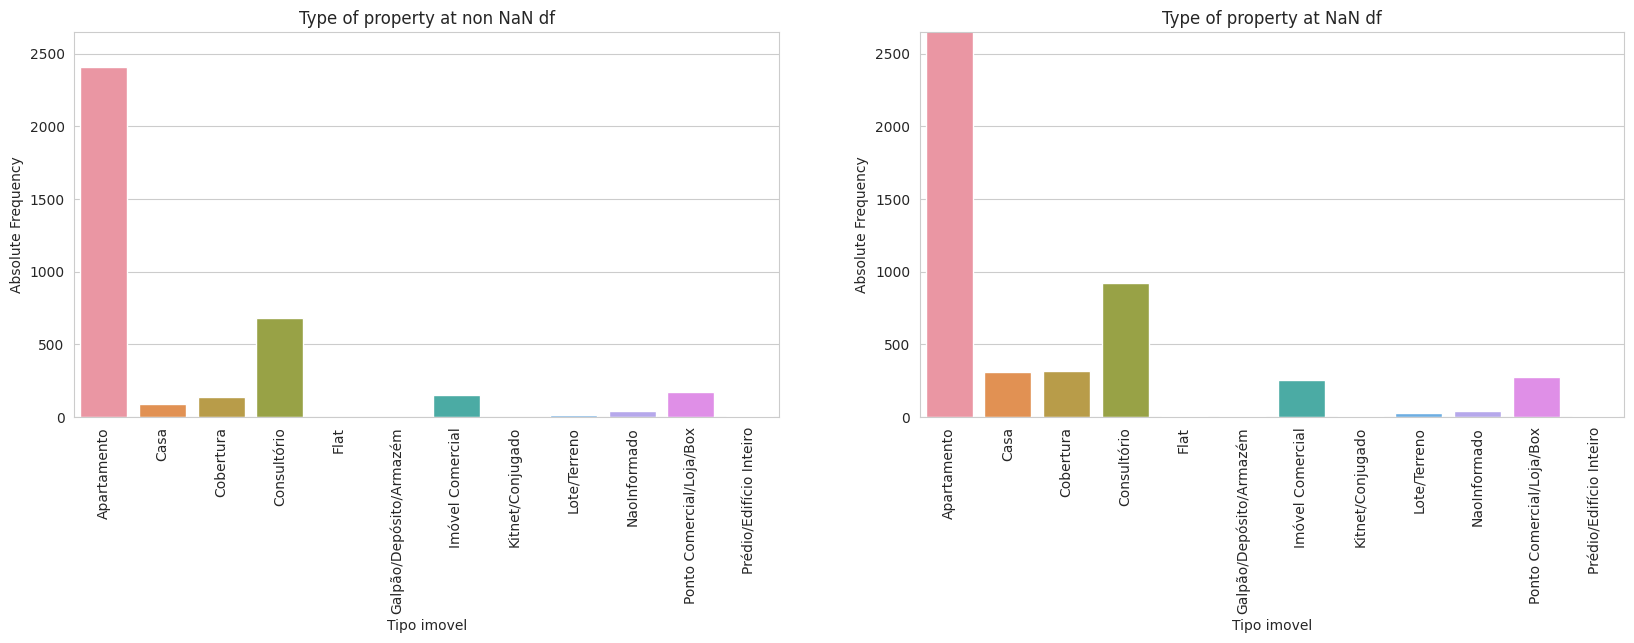

In [42]:
# Here we will combine the columns 'tipo_imovel' with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'tipo_imovel'
titles = ['Type of property at non NaN df', 'Type of property at NaN df']

max_y = 0
max_val = df[column].value_counts().max() * 1.1 

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df, ds]):
    
    df_to_plot = dataframe[column].value_counts().reset_index()
    df_to_plot.columns = ['type', 'absolute_frequency']
    df_to_plot.sort_values(by='type', inplace=True)
    
    f = sns.barplot(x='type', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel=column.replace('_', ' ').capitalize(), ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_val))

plt.show()

**Comparing the df and ds** we can see that ds, indeed, there are more records at any classes at 'tipo_imovel'.

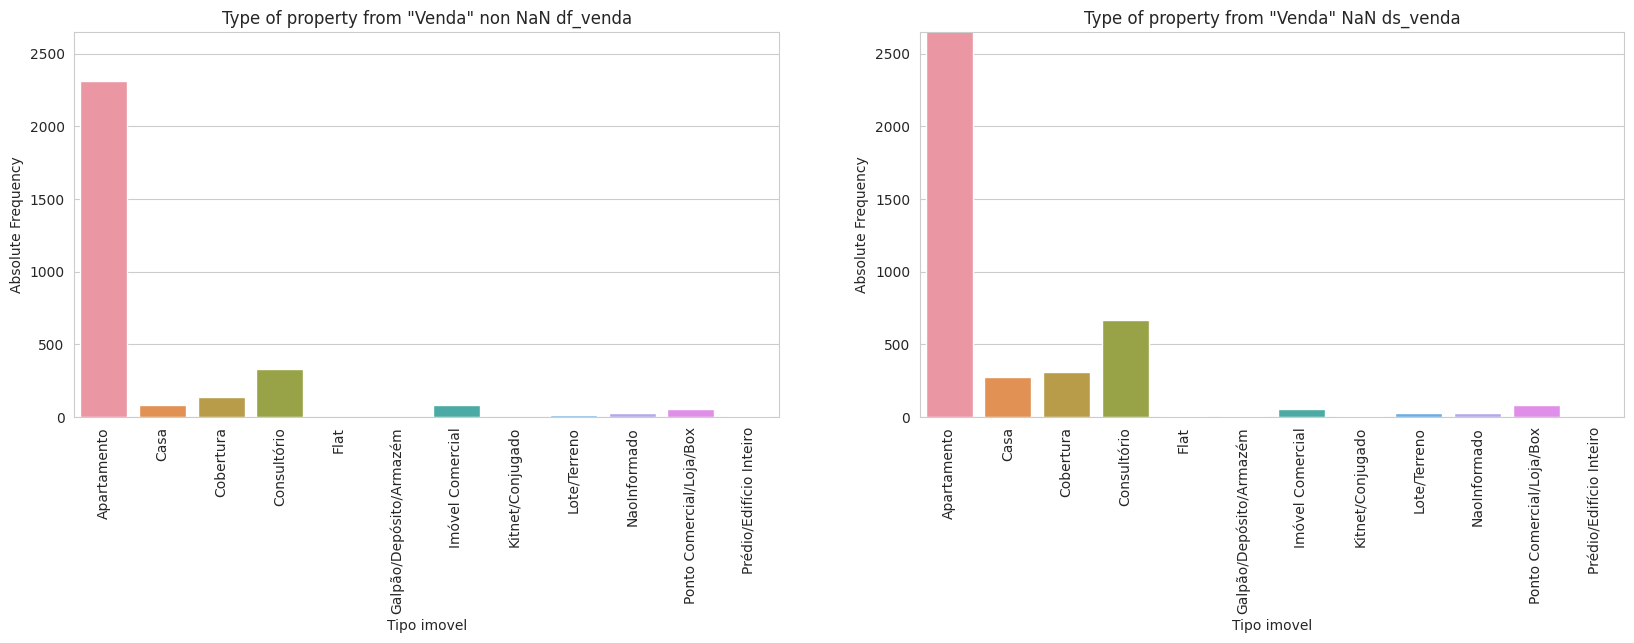

In [43]:
# Here we will combine the columns 'tipo_imovel' == 'Venda' with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'tipo_imovel'
titles = ['Type of property from "Venda" non NaN df_venda', 'Type of property from "Venda" NaN ds_venda']

max_y = 0
max_val = df[column].value_counts().max() * 1.1 

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df_venda, ds_venda]):
    
    df_to_plot = dataframe[column].value_counts().reset_index()
    df_to_plot.columns = ['type', 'absolute_frequency']
    df_to_plot.sort_values(by='type', inplace=True)
    
    f = sns.barplot(x='type', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel=column.replace('_', ' ').capitalize(), ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_val))

plt.show()

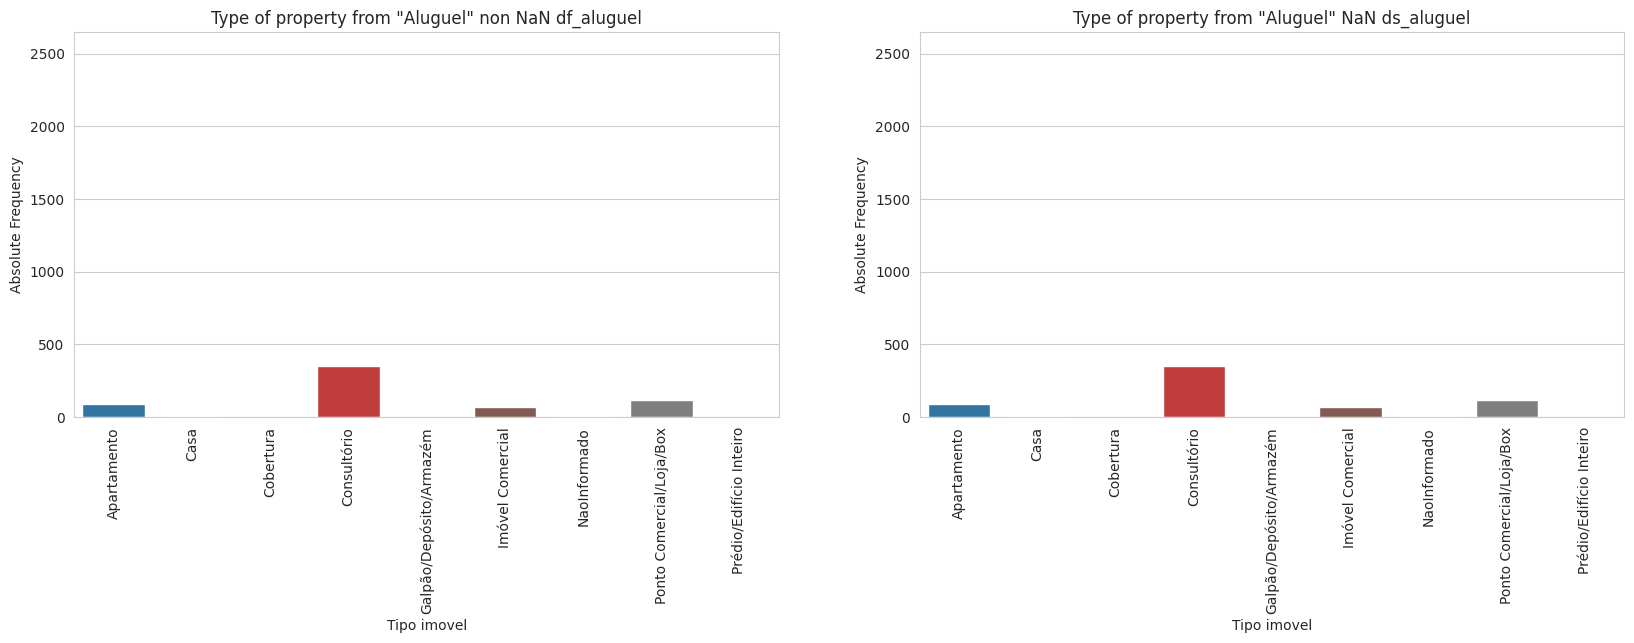

In [44]:
# Here we will combine the columns 'tipo_imovel' == 'Aluguel' with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'tipo_imovel'
titles = ['Type of property from "Aluguel" non NaN df_aluguel', 'Type of property from "Aluguel" NaN ds_aluguel']

max_y = 0
max_val = df[column].value_counts().max() * 1.1 

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df_aluguel, ds_aluguel]):
    
    df_to_plot = dataframe[column].value_counts().reset_index()
    df_to_plot.columns = ['type', 'absolute_frequency']
    df_to_plot.sort_values(by='type', inplace=True)
    
    f = sns.barplot(x='type', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel=column.replace('_', ' ').capitalize(), ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_val))

plt.show()

In [45]:
# Now we are visualize the relation between the default and numeric atributes:

df_venda.drop(['date_part', 'id', 'estado_construcao', 'bl_temporada', 'cep', 'numero', 'precisao', 'is_outlier'], axis = 1).select_dtypes('number').head(n=5)

area  num_andares  num_vagas_garagem  num_suites  num_banheiros  \
1    46.0            7                  2           1              2   
4    77.0            0                  2           1              2   
6   197.0            0                  1           1              3   
9    31.0            0                  0           0              1   
11  135.0            0                  1           1              3   

    num_quartos      valor    iptu  taxa_condominial       contato        lat  \
1             1   460000.0   600.0             700.0  4.899900e+10 -27.589367   
4             3  1070000.0  1300.0             999.0  4.899913e+10 -27.592156   
6             3  1100000.0  3010.0            1331.0  4.898835e+10 -27.590322   
9             1   220000.0   850.0             350.0  4.899156e+10 -27.595942   
11            3   915000.0     0.0               0.0           NaN -27.589903   

          lon      valor_m2  
1  -48.540706  10000.000000  
4  -48.553534  13896.103896  
6  -48.552777   5583.756345  
9  -48.549452   7096.774194  
11 -48.559296   6777.777778

In [46]:
# Now we are visualize the relation between the default and numeric atributes:

ds_venda.drop(['date_part', 'id', 'estado_construcao', 'bl_temporada', 'cep', 'numero', 'precisao', 'is_outlier'], axis = 1).select_dtypes('number').head(n=5)

area  num_andares  num_vagas_garagem  num_suites  num_banheiros  \
0   91.0            0                  2           1              1   
1   75.0            0                  2           1              2   
2   80.0            0                  1           0              2   
3   93.0           12                  1           1              1   
5  124.0            0                  2           1              3   

   num_quartos      valor    iptu  taxa_condominial       contato  ponto  lat  \
0            3  1160361.0     NaN               NaN  4.899130e+10    NaN  NaN   
1            3   310000.0     0.0             600.0  4.898447e+10    NaN  NaN   
2            3   688000.0  1600.0             850.0  4.898458e+10    NaN  NaN   
3            2  1100000.0  2088.0             800.0  4.899813e+10    NaN  NaN   
5            3   850000.0   137.0            1200.0  4.898402e+10    NaN  NaN   

   lon  latlong      valor_m2  
0  NaN      NaN  12751.219780  
1  NaN      NaN   4133.333333  
2  NaN      NaN   8600.000000  
3  NaN      NaN  11827.956989  
5  NaN      NaN   6854.838710

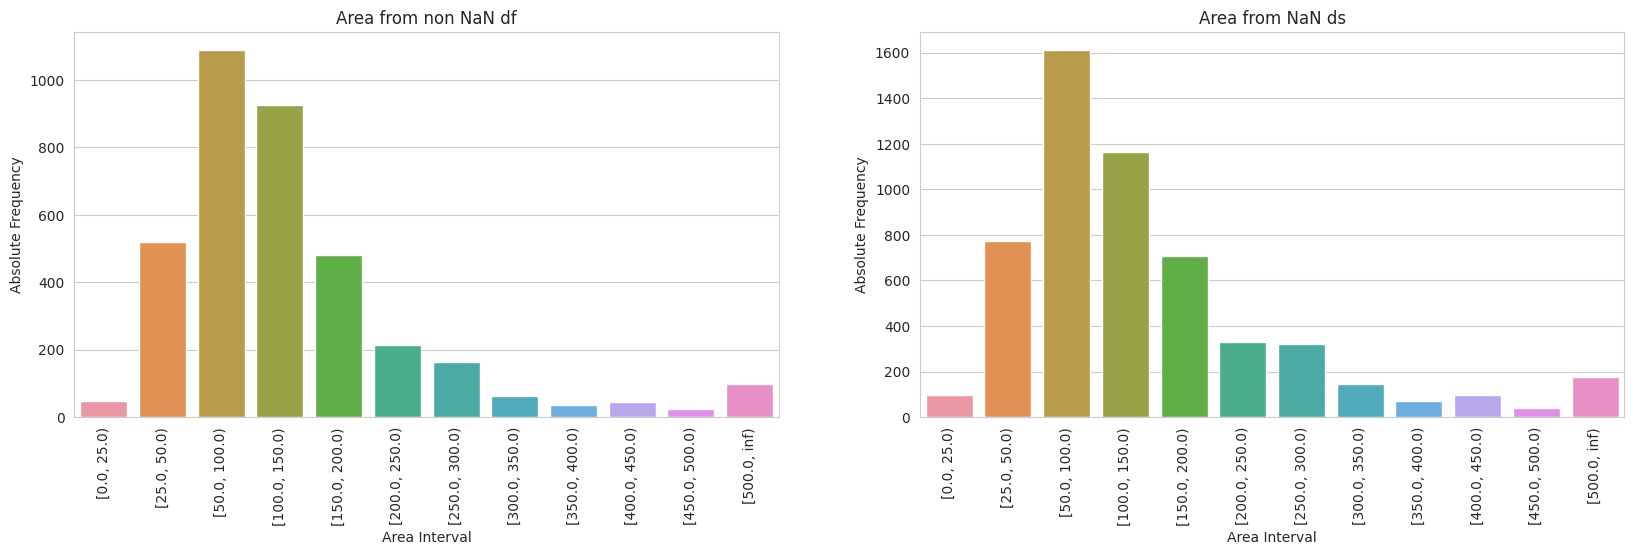

In [47]:
# Here we will combine the columns 'area' clustering in a specific with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'area'
titles = ['Area from non NaN df', 'Area from NaN ds']

max_y = 0


bins = [0, 25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df, ds]):
    # Use pd.cut() para criar intervalos e contar quantos valores estão em cada intervalo
    df_to_plot = pd.cut(dataframe[column], bins, right=False).value_counts().reset_index()
    df_to_plot.columns = ['area_interval', 'absolute_frequency']
    df_to_plot.sort_values(by='area_interval', inplace=True)
    
    f = sns.barplot(x='area_interval', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel='Area Interval', ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

plt.show()

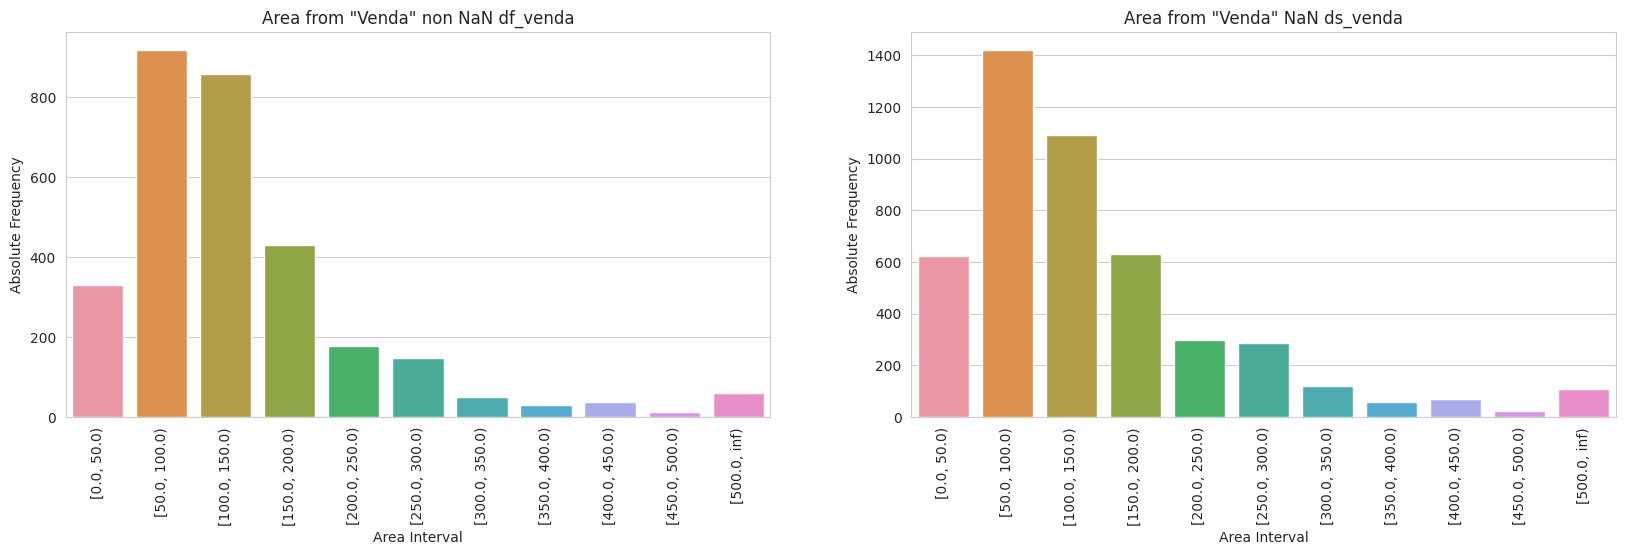

In [48]:
# Here we will combine the columns 'area' clustering in a specific with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'area'
titles = ['Area from "Venda" non NaN df_venda', 'Area from "Venda" NaN ds_venda']

max_y = 0


bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df_venda, ds_venda]):
    # Use pd.cut() para criar intervalos e contar quantos valores estão em cada intervalo
    df_to_plot = pd.cut(dataframe[column], bins, right=False).value_counts().reset_index()
    df_to_plot.columns = ['area_interval', 'absolute_frequency']
    df_to_plot.sort_values(by='area_interval', inplace=True)
    
    f = sns.barplot(x='area_interval', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel='Area Interval', ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

plt.show()

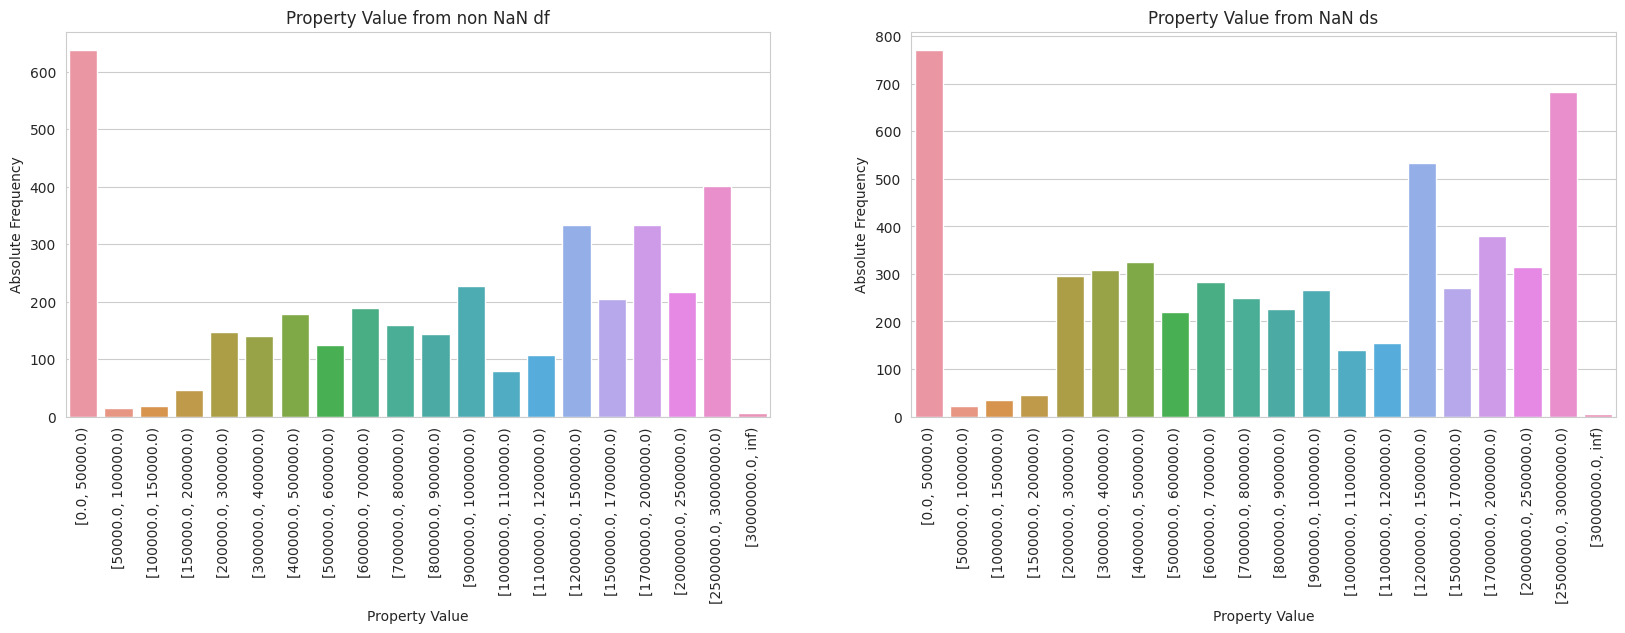

In [49]:
# Here we will combine the columns 'valor' clustering in a specific with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'valor'
titles = ['Property Value from non NaN df', 'Property Value from NaN ds']

max_y = 0


bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1500000, 1700000, 2000000, 2500000, 30000000, float('inf')]

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df, ds]):
    # Use pd.cut() para criar intervalos e contar quantos valores estão em cada intervalo
    df_to_plot = pd.cut(dataframe[column], bins, right=False).value_counts().reset_index()
    df_to_plot.columns = ['property_value', 'absolute_frequency']
    df_to_plot.sort_values(by='property_value', inplace=True)
    
    f = sns.barplot(x='property_value', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel='Property Value', ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

plt.show()

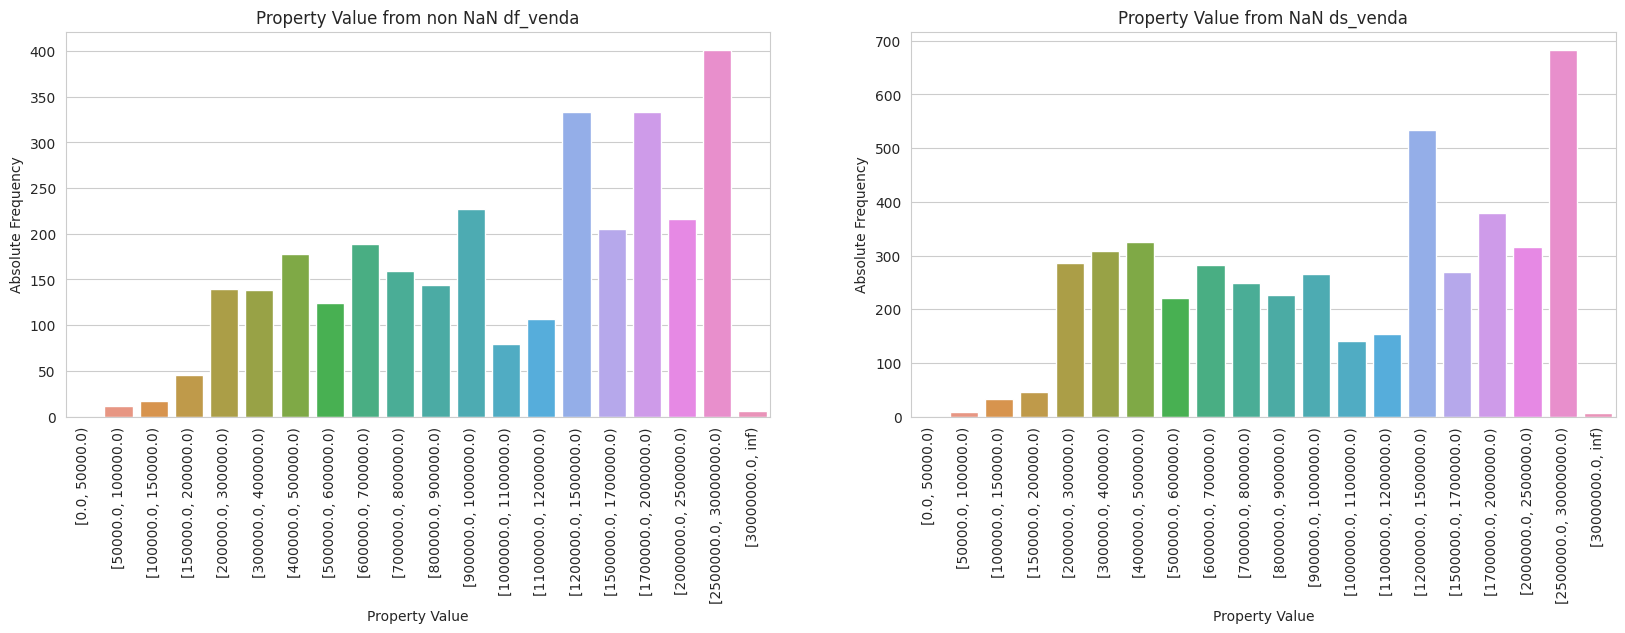

In [50]:
# Here we will combine the columns 'valor' clustering in a specific with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'valor'
titles = ['Property Value from non NaN df_venda', 'Property Value from NaN ds_venda']

max_y = 0


bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1500000, 1700000, 2000000, 2500000, 30000000, float('inf')]

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df_venda, ds_venda]):
    # Use pd.cut() para criar intervalos e contar quantos valores estão em cada intervalo
    df_to_plot = pd.cut(dataframe[column], bins, right=False).value_counts().reset_index()
    df_to_plot.columns = ['property_value', 'absolute_frequency']
    df_to_plot.sort_values(by='property_value', inplace=True)
    
    f = sns.barplot(x='property_value', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel='Property Value', ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

plt.show()

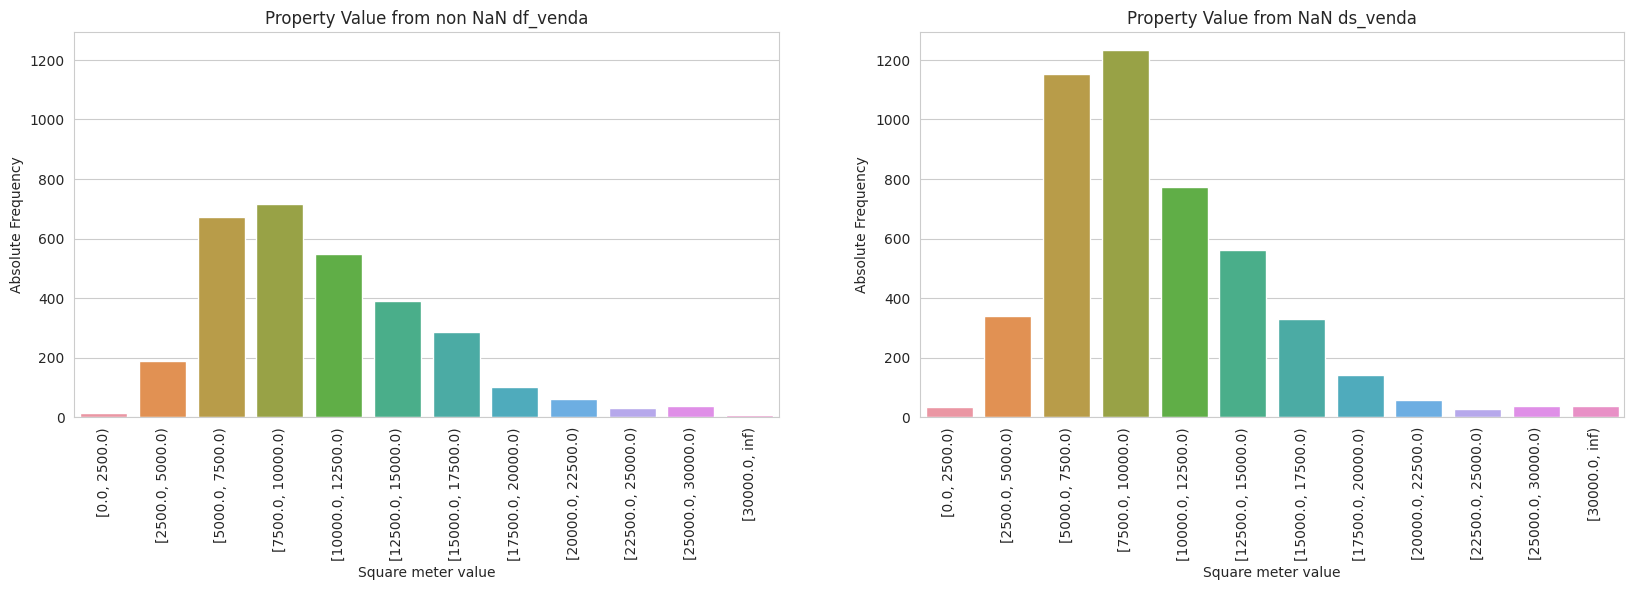

In [51]:
# Here we will combine the columns 'valor' clustering in a specific with your absolute frequency between the non NaN df (df) and NaN df (ds): 

column = 'valor_m2'
titles = ['Property Value from non NaN df_venda', 'Property Value from NaN ds_venda']

max_y = 0


bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 30000, float('inf')]
max_y = 0

figure, axis = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

for axle, dataframe in enumerate([df_venda, ds_venda]):
    df_to_plot = pd.cut(dataframe[column], bins, right=False).value_counts().reset_index()
    df_to_plot.columns = ['property_value', 'absolute_frequency']
    df_to_plot.sort_values(by='property_value', inplace=True)
    
    f = sns.barplot(x='property_value', y='absolute_frequency', data=df_to_plot, ax=axis[axle])
    f.set(title=titles[axle], xlabel='Square meter value', ylabel='Absolute Frequency')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

# Defina o mesmo limite superior (max_y) para ambos os gráficos
for ax in axis:
    ax.set(ylim=(0, max_y))

plt.show()

**Both of df_venda and ds_venda** have the same pattern at the bars of the graph!

# Let's create our maps and do our spatial analysis!

At the end, and for finish with our main objective **to represent the Apartament Square Meter Value in the Downtown of Florianópolis City** we will create some maps to represent it.

In [52]:
import folium
import ipywidgets as widgets

from folium import LayerControl

from folium.plugins import HeatMap
from branca.colormap import LinearColormap
from folium.plugins import HeatMap
from branca.colormap import LinearColormap
from IPython.display import display

In [53]:
# Yes we still have problmens with NaNs. Probably the nans are in the 'valor_m2' column

df_venda_clean = df_venda.dropna(subset=['lat', 'lon', 'valor_m2'])
df_venda_clean = df_venda_clean[df_venda_clean['tipo_imovel'] == 'Apartamento']


In [54]:
# Creating a folium map
m = folium.Map(location=[df_venda_clean['lat'].mean(), df_venda_clean['lon'].mean()], zoom_start=15)

# Adding simple markes for each point 
for row in df_venda_clean.itertuples():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        radius=5,  
        color='blue',  
        fill=True,
        fill_color='blue',  
        fill_opacity=0.6,  
        popup=f'Square meter value: R${row.valor_m2:.2f}'
    ).add_to(m)

# Show de interactive map
display(m)


In [55]:
# Creating a map using a CartoDB style
m = folium.Map(location=[df_venda_clean['lat'].mean(), df_venda_clean['lon'].mean()], zoom_start=15, tiles='cartodbpositron')

# Creating a list wifh coordinates and associated values
data = [[row['lat'], row['lon'], row['valor_m2']] for index, row in df_venda_clean.iterrows()]

# Setting a collor gradient
colormap = LinearColormap(
    colors = ['#FFFFCC', '#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C', '#FC4E2A', '#E31A1C', '#BD0026', '#800026'],
    index=[0, 5000, 10000, 12500, 15000, 20000, 25000],
    vmin=0,
    vmax=25000
)

# Creating a heatmap with the associanted values
HeatMap(data, gradient={0.0: colormap(0), 0.1667: colormap(5000), 0.3333: colormap(10000), 0.5: colormap(15000), 0.6667: colormap(20000), 0.8333: colormap(25000), 1.0: colormap(30000)}).add_to(m)

# Adding legends at the map
colormap.caption = 'Square meter value'
colormap.add_to(m)

# Showing the interactive map
m


**Let's integrate a point and heatmap!**

In [56]:
# Creating a map using a CartoDB style
m = folium.Map(
    location=[df_venda_clean['lat'].mean(), df_venda_clean['lon'].mean()],
    zoom_start=15,
    tiles='cartodbpositron'
)

# Creating a list wifh coordinates and associated values
data = [[row['lat'], row['lon'], row['valor_m2']] for index, row in df_venda_clean.iterrows()]

# Defining a collor gradient
colormap = LinearColormap(
    colors=['#FFFFCC', '#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C', '#E31A1C', '#BD0026'],
    index=[0, 5000, 10000, 12500, 15000, 20000, 25000],
    vmin=0,
    vmax=25000
)


# Creating a heatmap with the associanted values
HeatMap(data, gradient={0.1667: colormap(5000), 0.3333: colormap(10000), 0.5: colormap(15000), 0.6667: colormap(20000), 0.8333: colormap(25000), 1.0: colormap(30000)}, name='Heat Map').add_to(m)

# adding legend in the map
colormap.caption = 'Square meter Apartaments value'
colormap.add_to(m)

# Adding simple markes for each point 
points_layer = folium.FeatureGroup(name="Points")
for row in df_venda_clean.itertuples():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        radius=3.2,  
        color='rgba(225, 225, 225, 0.35)',  
        fill=True,
        fill_color='rgba(135, 135, 135, 0.35)',  
        fill_opacity=0.6,
        popup=f'Square meter Apartament value: R${row.valor_m2:.2f}'
    ).add_to(points_layer)

# Adding layers to map
points_layer.add_to(m)

# Addomg a map controls
LayerControl().add_to(m)

# Showing the interactive map
m


In [57]:
# Saving the map in HTML

m.save("heatmap_fdrsa.html")


# Final Considerations

At the final of this data acquisition,cleanig,transforming and visualizing and many skills was acquired. 

* One of the most important was the habit to was documenting the process through the codes and text. This turned the work easier because this project was developed more than a single day.

* Other important factor is relationed with the full knowledge about the data and its problemns. This is an important and crucial thing to observe and develope and improve the analytic skills in the next work.

* At the end, I can get the main objective to spacialize the Square Meter of the Apartaments at the Downtown in Florianópolis.

I'm so glad about this work.

If you have any consideration or apointment, cosider send a message, review or post about it.

Cya.